In [1]:
import pandas as pd
df2 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')


# df
df2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [2]:
class_d2 = df2['Diabetes_binary'].value_counts()
# class_d2 = df['Diabetes_012'].value_counts()

class_d2
# class_d2

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [3]:
import matplotlib.pyplot as plt


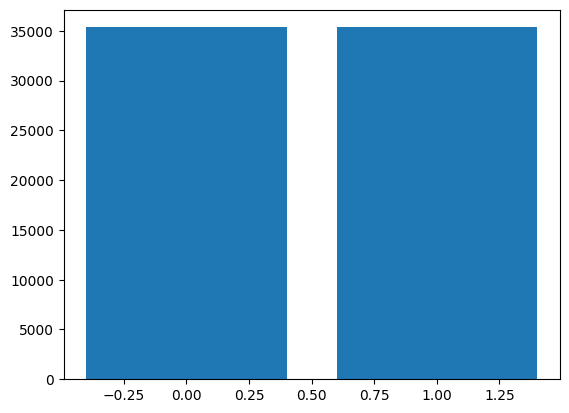

In [4]:
plt.bar(class_d2.index, class_d2.values)
plt.show()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from scipy.stats import pointbiserialr
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
df_binary = df2

continious_cols = []
for cols in df2.columns:

    if (cols  in 'Diabetes_binaryDBMIGenHlthMentHlthPhysHlthAgeEducationIncome'):
        df_binary = df_binary.drop([cols], axis= 'columns')
        continious_cols.append(cols)
        

corr_matrix = df_binary.phik_matrix(interval_cols=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'])

print('Binary to Binary Correlation Matrix:')
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



print('Continuous to Binary Correlation Matrices:')
df_continous_binary = df_binary

for col in continious_cols:
    print(col)
    df_continous_binary.insert(0,col, df2[col])
    pd_corr_mat = df_continous_binary.corr(method=lambda x, y: pointbiserialr(x, y)[0])
    plt.figure(figsize=(20, 20))
    sns.heatmap(pd_corr_mat, annot=True, cmap='coolwarm')
    df_continous_binary = df_continous_binary.drop([col], axis= 'columns')
    plt.show()

Binary to Binary Correlation Matrix:
Continuous to Binary Correlation Matrices:
Diabetes_binary
BMI
GenHlth
MentHlth
PhysHlth
Age
Education
Income


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Axes: >

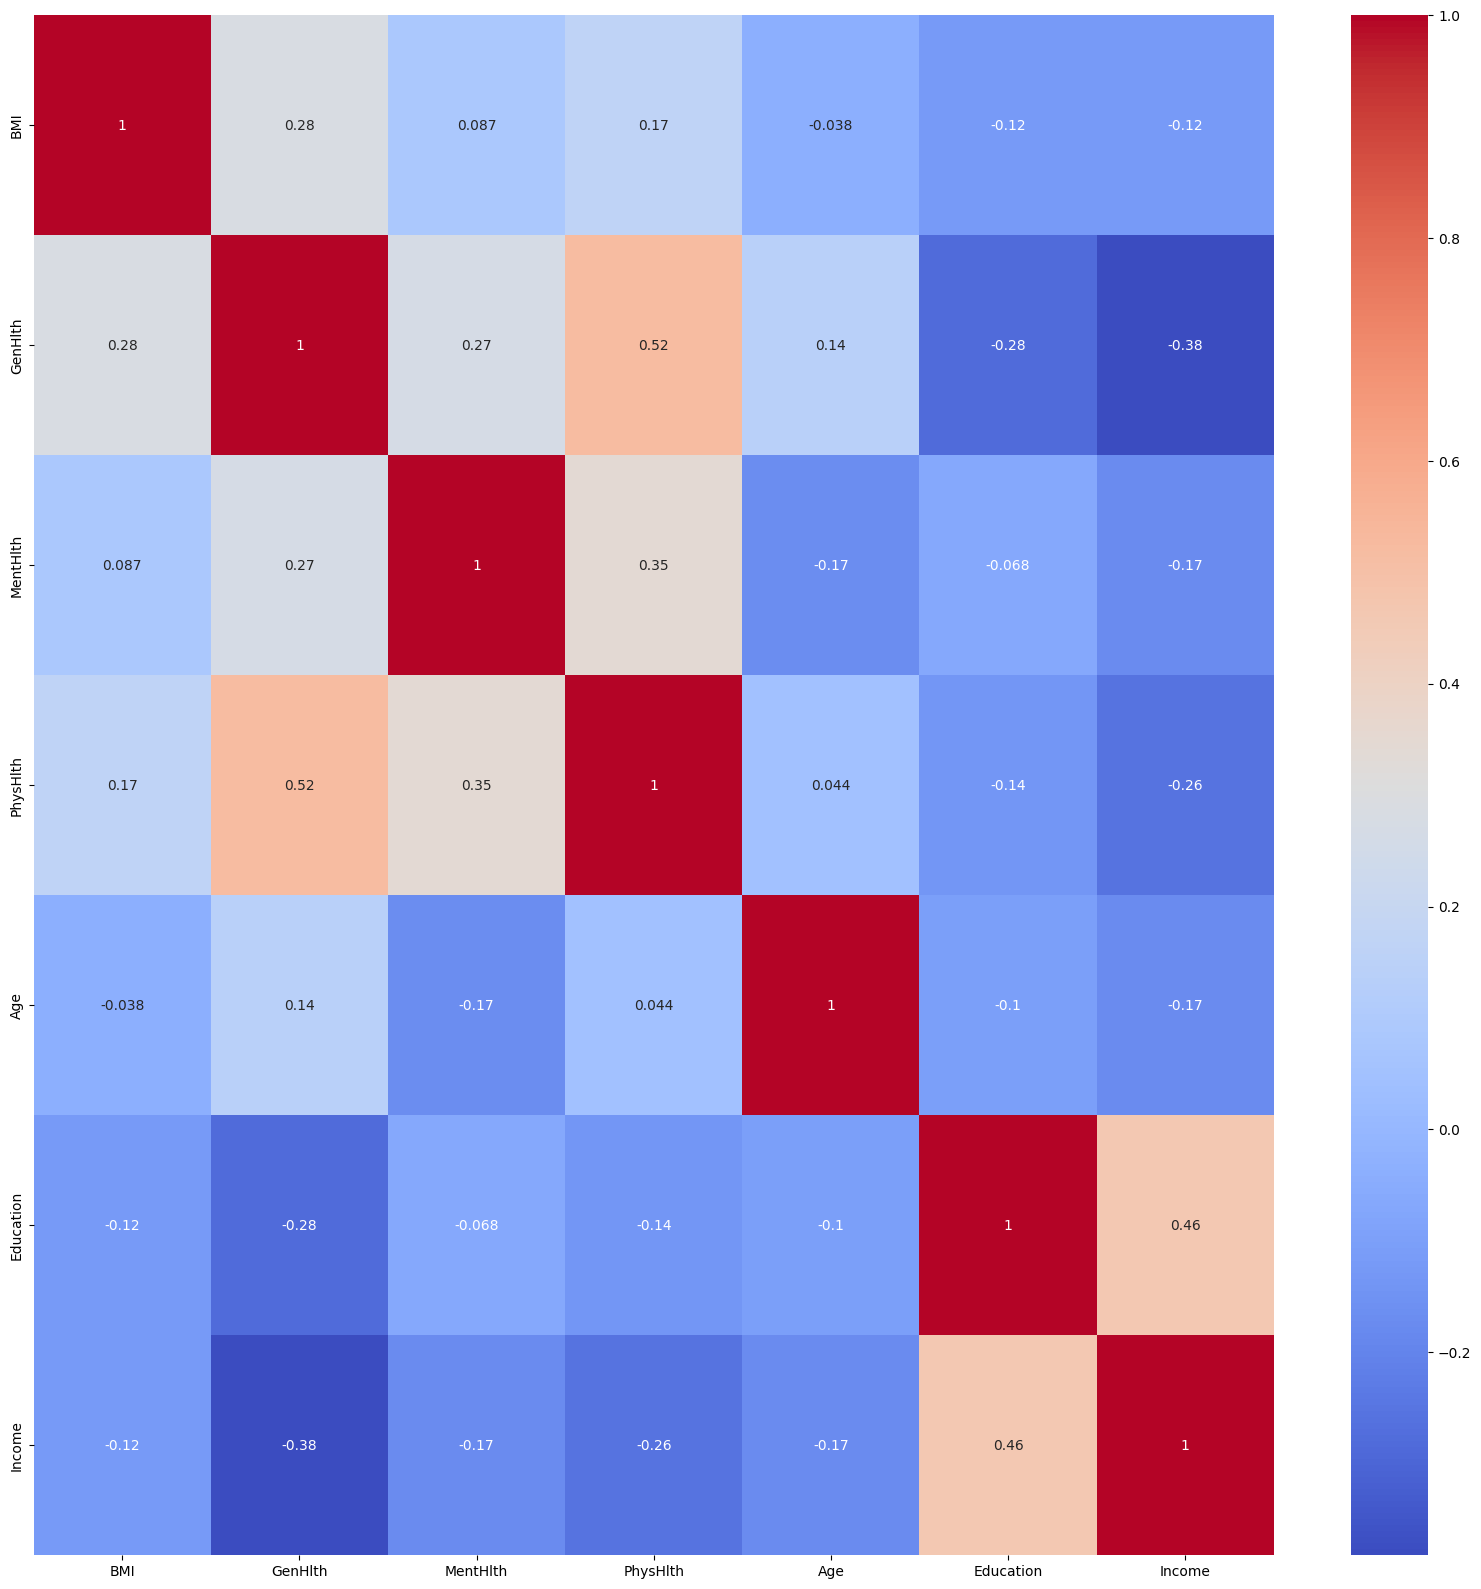

In [32]:

#Creating continuous
df_continuous = df2

for cols in df2.columns:
    # print(cols)
    if (cols not in 'DBMIGenHlthMentHlthPhysHlthAgeEducationIncome'):
        df_continuous = df_continuous.drop([cols], axis= 'columns')

df_continuous

corr_matrix = df_continuous.corr(method='spearman')
plt.figure(figsize=(20, 20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')